# 01 example 

In [1]:
import pyscan as ps
import numpy as np
import matplotlib.pyplot as plt

Could not load Keysight SD1
Could not load Keysight SD1
pylablib not found, AttocubeANC350 not loaded
Basler Camera software not found, BaserCamera not loaded
Helios Camera not installed
msl not installed, Thorlabs BSC203 driver not loaded
seabreeze module not found, Ocean Optics not imported
Failed to load spinapi library.
spinapi is not installed, PulseBlaster driver not loaded.
Thorlabs Kinesis not found, ThorlabsBSC203 not loaded
Thorlabs Kinesis not found, ThorlabsBPC303 not loaded
Thorlabs Kinesis not found, ThorlabsMFF101 not loaded


In [2]:
def generate_multiD_data(expt):
    """
    Generates fake data proportinal to scanX.i
    x1 - 0D data (point)
    x2 - 1D data (line/array)
    x3 - 2D data (2D array)
    """
     
    runinfo = expt.runinfo
    devices = expt.devices

    d = ps.ItemAttribute()

    v = runinfo.scan0.i + runinfo.scan1.i*runinfo.scan0.n + \
           runinfo.scan2.i*runinfo.scan0.n*runinfo.scan1.n + \
           runinfo.scan3.i*runinfo.scan0.n*runinfo.scan1.n*runinfo.scan2.n
    
    d.x1 = v
    d.x2 = [v for i in range(5)]
    d.x3 = [[v for i in range(5)] for j in range(5)]
    
    return d

In [3]:
# Setup devices as members of an ItemAttribute instance
devices = ps.ItemAttribute()

devices.v1 = ps.TestVoltage()
devices.v2 = ps.TestVoltage()
devices.v3 = ps.TestVoltage()


In [4]:
# 1D data
runinfo = ps.RunInfo()
runinfo.scan0 = ps.PropertyScan({'v1': ps.drange(0, 0.1, 1)}, prop='voltage', dt=0.01)

runinfo.measure_function = generate_multiD_data

# This is the only important difference
expt = ps.Sweep(runinfo, devices, time=True)
expt.start_thread()


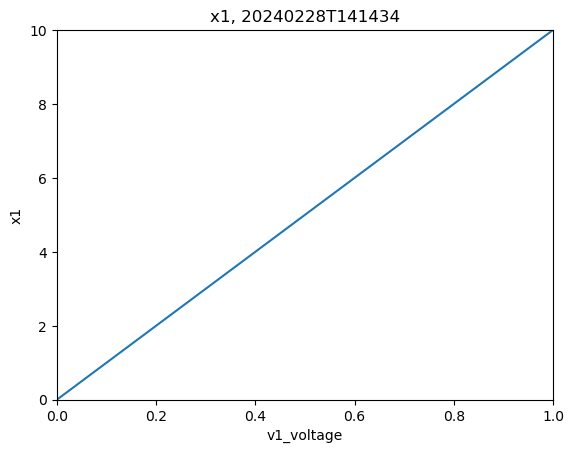

In [5]:
ps.live_plot1D(expt)

In [6]:
# 2D data
# Create RunInfo instance and set scan0 and scan1 to PropertyScan
runinfo = ps.RunInfo()
runinfo.scan0 = ps.PropertyScan({'v1': ps.drange(0, 0.1, 1)}, prop='voltage', dt=0.01)
runinfo.scan1 = ps.PropertyScan({'v2': ps.drange(0, 0.2, 1)}, prop='voltage', dt=0.01)

# Set RunInfo measure_function (remember, it takes a Sweep object as a parameter and 
# returns an ItemAttribute containing data)
runinfo.measure_function = generate_multiD_data

# Create a Sweep class with the RunInfo and Devices just created
expt = ps.Sweep(runinfo, devices)
expt.start_thread()


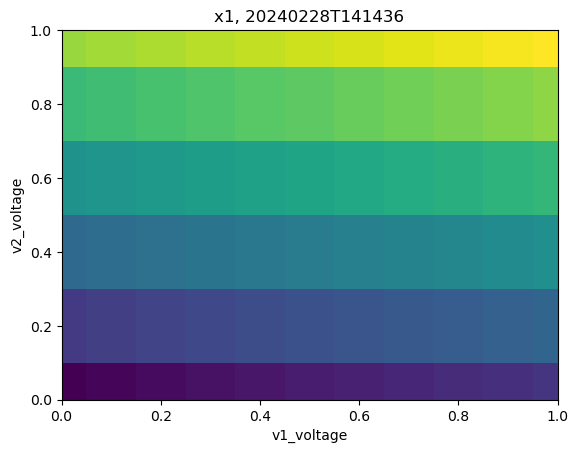

In [7]:
ps.live_plot2D(expt)

In [8]:
# 2D data, 2 instruments in scan0
runinfo = ps.RunInfo()
runinfo.scan0 = ps.PropertyScan({'v1': ps.drange(0, 0.1, 1),
                                 'v3': ps.drange(1, 0.1, 2)}, prop='voltage', dt=0.01)
runinfo.scan1 = ps.PropertyScan({'v2': ps.drange(0, 0.2, 1)}, prop='voltage', dt=0.01)

runinfo.measure_function = generate_multiD_data

# This is the only important difference
expt = ps.Sweep(runinfo, devices)
expt.start_thread()


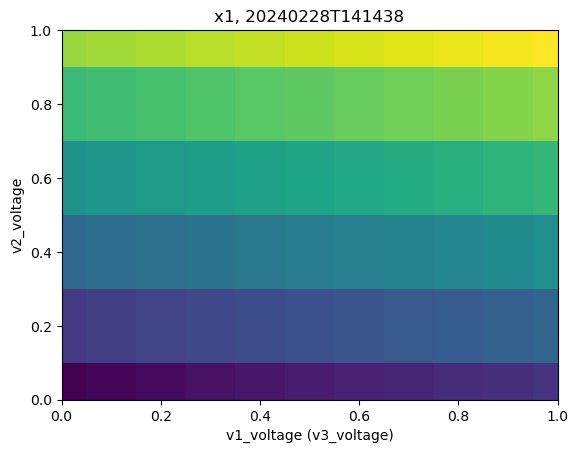

In [9]:
ps.live_plot2D(expt)